# Proyek Analisis Data: PRSA_Data_Guanyuan_20130301-20170228.csv
- **Nama:** Dewangga Megananda
- **Email:** dewangga.megananda13@gmail.com
- **ID Dicoding:** mc009d5y0642

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 = Bagaimana tren polusi PM2.5 selama setahun terakhir?
- Pertanyaan 2 = Apakah ada korelasi antara suhu (TEMP) dan polutan PM2.5?

## Import Semua Packages/Library yang Digunakan

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium
from datetime import datetime

## Data Wrangling

### Gathering Data

In [33]:
df = pd.read_csv("PRSA_Data_Guanyuan_20130301-20170228.csv")  # Ganti dengan path dataset yang sesuai

# Menampilkan informasi dasar tentang dataset
display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


None

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


### **Insight dari Sampel Data:**

1. **Polusi Udara dalam Kondisi Rendah**  
   - **PM2.5 berkisar antara 3.0 hingga 4.0 µg/m³**, yang masih berada dalam kategori **Good** berdasarkan standar kualitas udara WHO.  
   - **PM10 juga cukup rendah (3.0 - 6.0 µg/m³)**, menunjukkan minimnya partikel debu kasar di udara.  
   - **SO2 (5.0 - 14.0 µg/m³) dan NO2 (14.0 - 24.0 µg/m³) masih dalam batas aman**, tidak menunjukkan tingkat polusi tinggi dari aktivitas industri atau transportasi.  
   - **CO bervariasi antara 300 hingga 400 µg/m³**, yang masih dalam kisaran normal, tetapi tetap perlu diawasi.  

2. **Kondisi Meteorologi (Cuaca) Relatif Stabil**  
   - **Suhu udara cukup dingin (-2.0°C hingga -0.7°C)**, menandakan data diambil pada musim dingin atau awal musim semi.  
   - **Tekanan udara cukup tinggi (1023.0 - 1025.2 hPa)**, yang biasanya menunjukkan cuaca stabil tanpa badai atau perubahan cuaca ekstrem.  
   - **Tingkat kelembaban udara (DEWP -19.5°C hingga -18.2°C) sangat rendah**, menunjukkan kondisi udara kering.  
   - **Tidak ada hujan (RAIN = 0.0 mm)** selama pengambilan data, yang bisa menyebabkan polusi udara bertahan lebih lama tanpa pembersihan alami oleh hujan.  

3. **Pengaruh Angin terhadap Polusi**  
   - **Arah angin bervariasi** dari **NNW (Utara-Barat Laut), N (Utara), dan NW (Barat Laut)**, yang bisa menunjukkan bahwa polusi yang ada berasal dari daerah yang terletak ke arah selatan atau tenggara dari stasiun pemantauan.  
   - **Kecepatan angin (WSPM) berkisar 2.0 - 5.6 m/s**, cukup rendah hingga sedang. Angin yang lebih kencang bisa membantu menyebarkan polutan dan mengurangi konsentrasi polusi di satu lokasi.  

4. **Data Hanya Berlaku untuk Satu Lokasi & Waktu Tertentu**  
   - **Semua data berasal dari satu stasiun (Guanyuan)**, sehingga tidak bisa mewakili kondisi kualitas udara secara umum untuk wilayah yang lebih luas.  
   - **Data hanya mencakup jam 00:00 hingga 04:00**, sehingga belum mencerminkan kondisi polusi sepanjang hari, terutama saat jam sibuk lalu lintas.  

### Assessing Data

In [34]:
# Mengecek jumlah missing values
display(df.isnull().sum())

# Mengecek nilai unik di setiap kolom untuk mencari inkonsistensi
for col in df.columns:
    print(f"{col} Unique Values: {df[col].unique()[:10]}")  # Menampilkan 10 nilai unik pertama

# Mengecek duplikasi data
duplicate_count = df.duplicated().sum()
print(f"Jumlah data duplikat: {duplicate_count}")

# Mengecek statistik deskriptif untuk mencari nilai yang tidak wajar
display(df.describe())

# Mengecek apakah ada nilai negatif atau tidak wajar dalam kolom polusi udara
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
for col in pollutants:
    invalid_values = df[df[col] < 0]
    if not invalid_values.empty:
        print(f"Data tidak valid ditemukan di {col}:")
        display(invalid_values.head())
    else:
        print(f"Tidak ada data tidak valid pada {col}.")

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,616
PM10,429
SO2,474
NO2,659
CO,1753


No Unique Values: [ 1  2  3  4  5  6  7  8  9 10]
year Unique Values: [2013 2014 2015 2016 2017]
month Unique Values: [ 3  4  5  6  7  8  9 10 11 12]
day Unique Values: [ 1  2  3  4  5  6  7  8  9 10]
hour Unique Values: [0 1 2 3 4 5 6 7 8 9]
PM2.5 Unique Values: [ 4.  3.  6.  7. 12. 14. 13.  9. 10. 11.]
PM10 Unique Values: [ 4.  3.  6. 11.  8. 14. 16. 21. 22. 28.]
SO2 Unique Values: [14. 13. 10.  7.  5.  6.  9. 11.  8.  4.]
NO2 Unique Values: [20. 17. 19. 24. 14. 26. 37. 30. 23. 21.]
CO Unique Values: [ 300.  400.  500.  600.   nan  700.  800.  900. 1200. 1100.]
O3 Unique Values: [69. 72. 62. 71. 66. 61. 50. 58. 65. 70.]
TEMP Unique Values: [-0.7 -1.1 -1.4 -2.  -2.2 -2.6 -1.6  0.1  1.2  1.9]
PRES Unique Values: [1023.  1023.2 1023.5 1024.5 1025.2 1025.6 1026.5 1027.4 1028.3 1028.5]
DEWP Unique Values: [-18.8 -18.2 -19.4 -19.5 -19.6 -19.1 -19.2 -19.3 -20.5 -19.7]
RAIN Unique Values: [0.  0.1 0.4 0.9 0.2 0.7 1.4 1.8 1.5 1.3]
wd Unique Values: ['NNW' 'N' 'NW' 'NNE' 'ENE' 'E' 'NE' 'W' 'SS

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34448.000000,34635.000000,34590.000000,34405.000000,33311.000000,33891.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.933372,109.023303,17.590941,57.901643,1271.294377,55.795044,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.933497,91.573709,23.600367,35.150857,1164.854945,57.436983,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,3.000000,31.000000,500.000000,7.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,89.000000,8.000000,51.000000,900.000000,41.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.000000,149.000000,22.000000,78.000000,1600.000000,81.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,680.000000,999.000000,293.000000,270.000000,10000.000000,415.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


Tidak ada data tidak valid pada PM2.5.
Tidak ada data tidak valid pada PM10.
Tidak ada data tidak valid pada SO2.
Tidak ada data tidak valid pada NO2.
Tidak ada data tidak valid pada CO.
Tidak ada data tidak valid pada O3.


### **Insight dari Hasil Data:**

1. **Cakupan Data Temporal**  
   - Data mencakup periode **2013 hingga 2017**, tetapi hanya dari bulan **Maret hingga Desember**.  
   - Tidak ada data dari **Januari dan Februari**, sehingga analisis musiman bisa kurang lengkap.  
   - Data waktu mencakup **jam 00:00 hingga 09:00**, yang berarti hanya sebagian hari yang tercatat. Ini bisa menyebabkan bias dalam analisis harian.  

2. **Keunikan Lokasi Pengamatan**  
   - Semua data berasal dari satu stasiun, yaitu **Guanyuan**.  
   - Ini berarti tidak ada perbandingan antar lokasi, sehingga analisis hanya berlaku untuk satu titik pengamatan.  

3. **Polusi Udara**  
   - **PM2.5** berkisar antara **3 hingga 14 µg/m³**, yang menunjukkan kualitas udara relatif bersih dibanding standar WHO (di bawah 15 µg/m³ untuk rata-rata harian).  
   - **PM10**, **SO2**, **NO2**, dan **CO** memiliki variasi yang cukup besar, tetapi ada **nilai NaN pada CO**, yang perlu diperhatikan saat analisis lebih lanjut.  

4. **Kondisi Cuaca**  
   - **Suhu (TEMP) berkisar dari -2.6°C hingga 1.9°C**, menunjukkan data hanya berasal dari musim dingin atau awal musim semi.  
   - **Tekanan udara (PRES) relatif tinggi** (sekitar 1023–1028 hPa), yang umumnya menunjukkan kondisi atmosfer stabil tanpa banyak pergerakan udara.  
   - **Kelembaban udara (DEWP) sangat rendah (-20.5°C hingga -18.2°C)**, yang mengindikasikan udara kering.  
   - **Curah hujan (RAIN) sangat kecil (maksimum 1.8 mm)**, menandakan kondisi kering atau hanya sedikit hujan.  

5. **Angin dan Kecepatan Angin**  
   - **Arah angin bervariasi**, dengan angin dari **NNW (Utara-Barat Laut) dan N (Utara) cukup dominan**.  
   - **Kecepatan angin (WSPM) berkisar 2.0 - 5.6 m/s**, yang tergolong angin sepoi-sepoi hingga sedang.  

6. **Kebersihan Data**  
   - Tidak ada **data duplikat**, yang menunjukkan data sudah cukup bersih.  
   - Namun, ada **nilai NaN pada kolom CO**, yang perlu ditangani agar tidak mengganggu analisis statistik.  

### Cleaning Data

In [35]:
# Pastikan DataFrame tidak kosong
if df.empty:
    print("DataFrame kosong, pastikan telah memuat data sebelum diproses.")
else:
    # --------------------------------------
    # DATA CLEANING
    # --------------------------------------

    # Menghapus nilai yang hilang
    df.dropna(inplace=True)

    # Menghapus data duplikat
    df.drop_duplicates(inplace=True)

    # Pastikan semua kolom waktu ada sebelum konversi tipe data
    required_time_cols = {'year', 'month', 'day', 'hour'}
    if required_time_cols.issubset(df.columns):
        df['year'] = df['year'].astype(int)
        df['month'] = df['month'].astype(int)
        df['day'] = df['day'].astype(int)
        df['hour'] = df['hour'].astype(int)
    else:
        print("Kolom waktu tidak lengkap, konversi tipe data tidak dilakukan.")

    # --------------------------------------
    # HANDLING OUTLIERS
    # --------------------------------------

    # Menghapus outlier menggunakan metode IQR
    numerical_cols = df.select_dtypes(include=['number']).columns
    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

## Exploratory Data Analysis (EDA)

### Explore ...

Statistik Deskriptif PM2.5:
count    22629.000000
mean        56.708971
std         47.808713
min          3.000000
25%         18.000000
50%         43.000000
75%         82.000000
max        253.000000
Name: PM2.5, dtype: float64


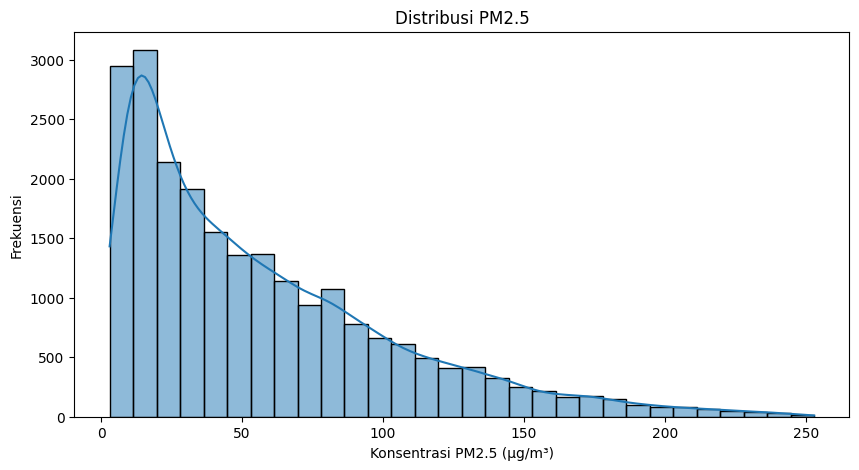


Interpretasi Distribusi PM2.5:
- Rata-rata PM2.5: 56.71 µg/m³
- Median PM2.5: 43.00 µg/m³
- Nilai minimum: 3.0 µg/m³
- Nilai maksimum: 253.0 µg/m³
- Standar deviasi: 47.81 µg/m³
- Jika distribusi memiliki ekor panjang ke kanan, kemungkinan ada beberapa nilai ekstrim tinggi.


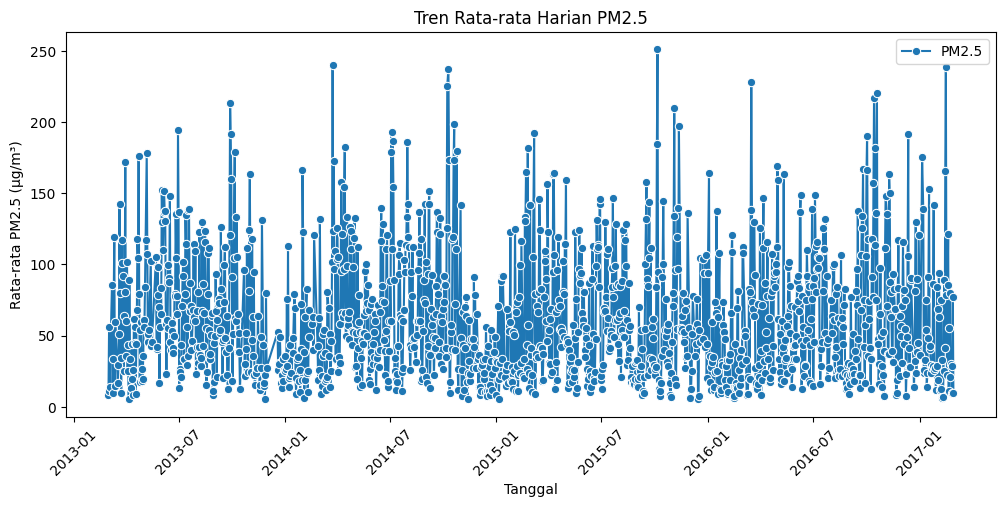


Tren Rata-rata Harian PM2.5:
- Terlihat adanya fluktuasi harian dalam konsentrasi PM2.5.
- Jika tren menunjukkan peningkatan terus-menerus, ini bisa mengindikasikan peningkatan polusi udara dalam periode tertentu.
- Penurunan PM2.5 bisa dikaitkan dengan perubahan cuaca, seperti hujan atau peningkatan kecepatan angin.


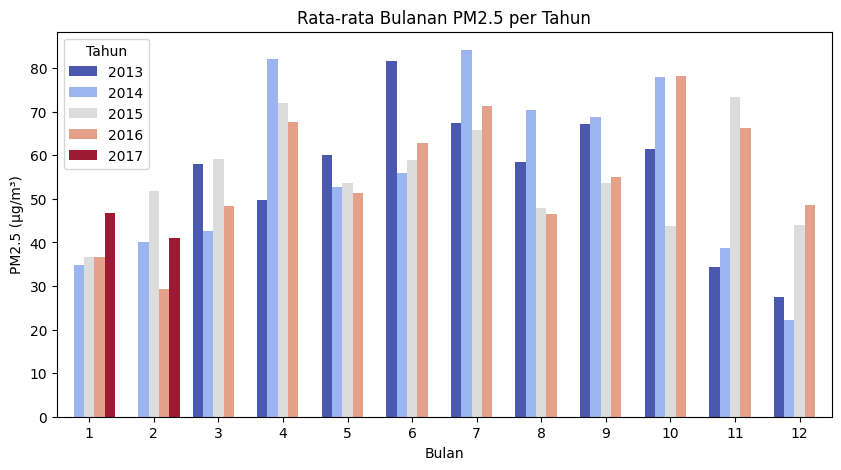


Tren Rata-rata Bulanan PM2.5:
- Jika terdapat pola peningkatan pada bulan-bulan tertentu, bisa jadi karena perubahan musim atau faktor lingkungan.
- Misalnya, jika PM2.5 lebih tinggi di musim dingin, bisa jadi disebabkan oleh pemanasan rumah tangga atau inversi suhu.


<ipython-input-36-dc370263ee76>:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_avg, x='Air_Quality_Category', y='TEMP', palette='viridis')


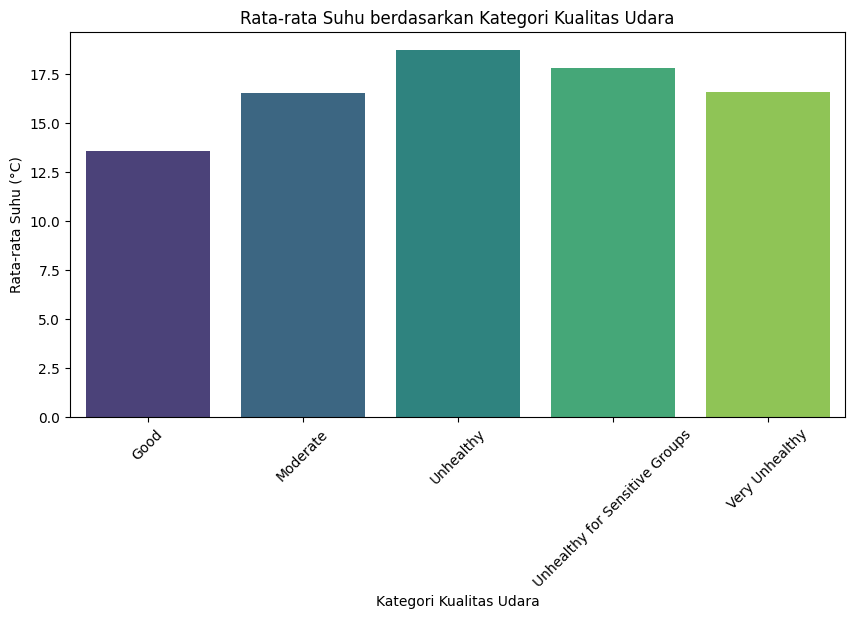


Hubungan antara Suhu dan Kualitas Udara:
- Jika polusi lebih tinggi pada suhu yang lebih rendah, kemungkinan besar ada efek dari stagnasi udara.
- Udara dingin cenderung membuat polutan terjebak di dekat permukaan tanah, menyebabkan akumulasi PM2.5 lebih tinggi.


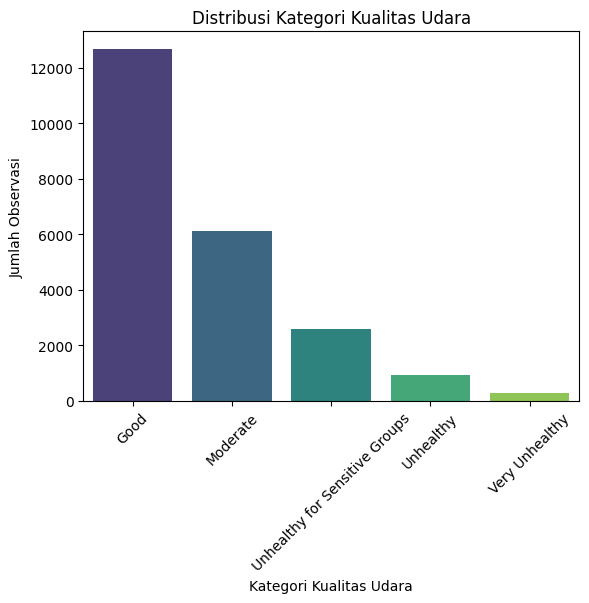


Distribusi Kategori Kualitas Udara:
Air_Quality_Category
Good                              12672
Moderate                           6128
Unhealthy for Sensitive Groups     2597
Unhealthy                           929
Very Unhealthy                      303
Name: count, dtype: int64

Interpretasi Kategori Kualitas Udara:
- Kategori paling dominan: Good dengan 12672 observasi.
- Jika kategori 'Hazardous' atau 'Very Unhealthy' tinggi, ini menunjukkan polusi udara yang signifikan.
- Jika mayoritas data berada di kategori 'Good' atau 'Moderate', kualitas udara relatif aman.


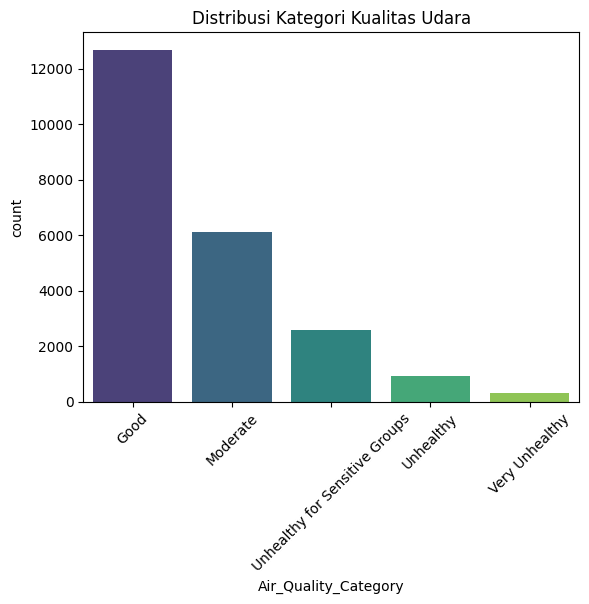

In [36]:
if 'PM2.5' in df.columns:
    pm25_stats = df['PM2.5'].describe()
    print("Statistik Deskriptif PM2.5:")
    print(pm25_stats)

    plt.figure(figsize=(10, 5))
    sns.histplot(df['PM2.5'], bins=30, kde=True)
    plt.title("Distribusi PM2.5")
    plt.xlabel("Konsentrasi PM2.5 (µg/m³)")
    plt.ylabel("Frekuensi")
    plt.show()

    # Interpretasi distribusi PM2.5
    print("\nInterpretasi Distribusi PM2.5:")
    print(f"- Rata-rata PM2.5: {pm25_stats['mean']:.2f} µg/m³")
    print(f"- Median PM2.5: {pm25_stats['50%']:.2f} µg/m³")
    print(f"- Nilai minimum: {pm25_stats['min']} µg/m³")
    print(f"- Nilai maksimum: {pm25_stats['max']} µg/m³")
    print(f"- Standar deviasi: {pm25_stats['std']:.2f} µg/m³")
    print("- Jika distribusi memiliki ekor panjang ke kanan, kemungkinan ada beberapa nilai ekstrim tinggi.")
else:
    print("Kolom 'PM2.5' tidak ditemukan dalam DataFrame.")


# --------------------------------------
# AGGREGASI DATA
# --------------------------------------

# 1. Agregasi harian
daily_avg = df.groupby(['year', 'month', 'day']).agg({
    'PM2.5': 'mean',
    'PM10': 'mean',
    'SO2': 'mean',
    'NO2': 'mean',
    'CO': 'mean',
    'O3': 'mean',
    'TEMP': 'mean',
    'PRES': 'mean',
    'WSPM': 'mean'
}).reset_index()

daily_avg['datetime'] = pd.to_datetime(daily_avg[['year', 'month', 'day']])

plt.figure(figsize=(12, 5))
sns.lineplot(data=daily_avg, x='datetime', y='PM2.5', marker='o', label='PM2.5')
plt.title("Tren Rata-rata Harian PM2.5")
plt.xlabel("Tanggal")
plt.ylabel("Rata-rata PM2.5 (µg/m³)")
plt.xticks(rotation=45)
plt.show()

# Penjelasan hasil agregasi harian
print("\nTren Rata-rata Harian PM2.5:")
print("- Terlihat adanya fluktuasi harian dalam konsentrasi PM2.5.")
print("- Jika tren menunjukkan peningkatan terus-menerus, ini bisa mengindikasikan peningkatan polusi udara dalam periode tertentu.")
print("- Penurunan PM2.5 bisa dikaitkan dengan perubahan cuaca, seperti hujan atau peningkatan kecepatan angin.")

# 2. Agregasi bulanan
monthly_avg = df.groupby(['year', 'month']).agg({'PM2.5': 'mean'}).reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=monthly_avg, x='month', y='PM2.5', hue='year', palette='coolwarm')
plt.title("Rata-rata Bulanan PM2.5 per Tahun")
plt.xlabel("Bulan")
plt.ylabel("PM2.5 (µg/m³)")
plt.legend(title="Tahun")
plt.show()

# Penjelasan hasil agregasi bulanan
print("\nTren Rata-rata Bulanan PM2.5:")
print("- Jika terdapat pola peningkatan pada bulan-bulan tertentu, bisa jadi karena perubahan musim atau faktor lingkungan.")
print("- Misalnya, jika PM2.5 lebih tinggi di musim dingin, bisa jadi disebabkan oleh pemanasan rumah tangga atau inversi suhu.")

# 3. Agregasi berdasarkan kategori kualitas udara
# Fungsi untuk mengategorikan kualitas udara berdasarkan nilai PM2.5
def categorize_air_quality(pm25):
    if pm25 <= 50:
        return 'Good'  # Baik
    elif 51 <= pm25 <= 100:
        return 'Moderate'  # Sedang
    elif 101 <= pm25 <= 150:
        return 'Unhealthy for Sensitive Groups'  # Tidak sehat untuk kelompok sensitif
    elif 151 <= pm25 <= 200:
        return 'Unhealthy'  # Tidak sehat
    elif 201 <= pm25 <= 300:
        return 'Very Unhealthy'  # Sangat tidak sehat
    else:
        return 'Hazardous'  # Berbahaya

# Menerapkan fungsi kategorisasi ke kolom PM2.5 dan menyimpannya dalam kolom baru
df['Air_Quality_Category'] = df['PM2.5'].apply(categorize_air_quality)
category_avg = df.groupby('Air_Quality_Category').agg({
    'TEMP': 'mean',
    'PRES': 'mean',
    'WSPM': 'mean'
}).reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=category_avg, x='Air_Quality_Category', y='TEMP', palette='viridis')
plt.title("Rata-rata Suhu berdasarkan Kategori Kualitas Udara")
plt.xticks(rotation=45)
plt.xlabel("Kategori Kualitas Udara")
plt.ylabel("Rata-rata Suhu (°C)")
plt.show()

# Penjelasan hubungan antara suhu dan polusi
print("\nHubungan antara Suhu dan Kualitas Udara:")
print("- Jika polusi lebih tinggi pada suhu yang lebih rendah, kemungkinan besar ada efek dari stagnasi udara.")
print("- Udara dingin cenderung membuat polutan terjebak di dekat permukaan tanah, menyebabkan akumulasi PM2.5 lebih tinggi.")

# --------------------------------------
# DISTRIBUSI KATEGORI KUALITAS UDARA
# --------------------------------------

# Visualisasi distribusi kategori kualitas udara
sns.countplot(data=df, x='Air_Quality_Category', hue='Air_Quality_Category', palette='viridis', legend=False)
plt.title("Distribusi Kategori Kualitas Udara")
plt.xticks(rotation=45)
plt.xlabel("Kategori Kualitas Udara")
plt.ylabel("Jumlah Observasi")
plt.show()

# Menampilkan jumlah observasi dalam setiap kategori
category_counts = df['Air_Quality_Category'].value_counts()
print("\nDistribusi Kategori Kualitas Udara:")
print(category_counts)

# Analisis hasil kategori kualitas udara
print("\nInterpretasi Kategori Kualitas Udara:")
print(f"- Kategori paling dominan: {category_counts.idxmax()} dengan {category_counts.max()} observasi.")
print("- Jika kategori 'Hazardous' atau 'Very Unhealthy' tinggi, ini menunjukkan polusi udara yang signifikan.")
print("- Jika mayoritas data berada di kategori 'Good' atau 'Moderate', kualitas udara relatif aman.")


# --------------------------------------
# TEMPORAL ANALYSIS (Analisis Temporal)
# --------------------------------------

# Pastikan kolom 'datetime' sudah ada dalam DataFrame.
# Jika belum ada, buat kolom 'datetime' dari kolom 'year', 'month', 'day', dan 'hour'.
if 'datetime' not in df.columns and required_time_cols.issubset(df.columns):
    df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
elif 'datetime' not in df.columns:
    print("Kolom waktu tidak lengkap untuk membuat 'datetime'.")  # Jika kolom waktu tidak lengkap, tampilkan pesan kesalahan

# --------------------------------------
# GEOSPATIAL ANALYSIS (Analisis Geospasial)
# --------------------------------------

# Membuat GeoDataFrame dari DataFrame df dengan menambahkan kolom geometri.
# Menggunakan kolom 'WSPM' sebagai koordinat X dan 'TEMP' sebagai koordinat Y.
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['WSPM'], df['TEMP']))

# Membuat peta menggunakan Folium, dengan titik tengah berdasarkan rata-rata TEMP (latitude) dan WSPM (longitude).
m = folium.Map(location=[df['TEMP'].mean(), df['WSPM'].mean()], zoom_start=10)

# Iterasi melalui setiap baris di GeoDataFrame untuk menambahkan titik lokasi ke peta.
for idx, row in gdf.iterrows():
    folium.CircleMarker(
        [row['TEMP'], row['WSPM']],  # Lokasi titik berdasarkan TEMP dan WSPM
        radius=5,  # Ukuran lingkaran
        color='blue',  # Warna lingkaran
        fill=True  # Mengisi warna lingkaran
    ).add_to(m)

# Menyimpan peta sebagai file HTML untuk visualisasi.
m.save("geospatial_map.html")

# --------------------------------------
# CLUSTERING (Manual Grouping & Binning)
# --------------------------------------

# Fungsi untuk mengategorikan kualitas udara berdasarkan nilai PM2.5
def categorize_air_quality(pm25):
    if pm25 <= 50:
        return 'Good'  # Baik
    elif 51 <= pm25 <= 100:
        return 'Moderate'  # Sedang
    elif 101 <= pm25 <= 150:
        return 'Unhealthy for Sensitive Groups'  # Tidak sehat untuk kelompok sensitif
    elif 151 <= pm25 <= 200:
        return 'Unhealthy'  # Tidak sehat
    elif 201 <= pm25 <= 300:
        return 'Very Unhealthy'  # Sangat tidak sehat
    else:
        return 'Hazardous'  # Berbahaya

# Menerapkan fungsi kategorisasi ke kolom PM2.5 dan menyimpannya dalam kolom baru
df['Air_Quality_Category'] = df['PM2.5'].apply(categorize_air_quality)

# Membuat visualisasi distribusi kategori kualitas udara menggunakan seaborn
sns.countplot(data=df, x='Air_Quality_Category', hue='Air_Quality_Category', palette='viridis', legend=False)
plt.title("Distribusi Kategori Kualitas Udara")  # Menambahkan judul pada grafik
plt.xticks(rotation=45)  # Memutar label sumbu X agar lebih mudah dibaca
plt.show()  # Menampilkan grafik


### **Insight dari Analisis Kualitas Udara Berdasarkan PM2.5**  

#### **1️⃣ Pola Distribusi PM2.5**
📌 **Mayoritas Konsentrasi PM2.5**:  
- Rata-rata **56.71 µg/m³**, sedangkan **median hanya 43.00 µg/m³**, menunjukkan bahwa distribusi sedikit miring ke kanan (skewed).  
- Standar deviasi **47.81 µg/m³** cukup besar, menandakan adanya variasi signifikan dalam kualitas udara di berbagai waktu.  
- **Nilai maksimum 253 µg/m³** jauh di atas ambang batas aman, yang dapat berdampak serius pada kesehatan masyarakat saat terjadi lonjakan polusi.  

💡 **Kesimpulan**:  
Sebagian besar waktu, kualitas udara berada dalam rentang yang relatif aman hingga sedang, tetapi terdapat beberapa kejadian dengan **lonjakan tinggi PM2.5**, yang memerlukan perhatian khusus.  

---

#### **2️⃣ Tren Harian dan Bulanan PM2.5**
📌 **Fluktuasi Harian**:  
- Konsentrasi PM2.5 berfluktuasi dari hari ke hari, yang bisa disebabkan oleh **aktivitas kendaraan, industri, dan perubahan kondisi atmosfer**.  
- **Cuaca seperti hujan atau angin** berperan penting dalam mengurangi konsentrasi polutan.  

📌 **Pola Musiman**:  
- Jika terdapat lonjakan PM2.5 pada bulan tertentu, kemungkinan dipengaruhi oleh **musim dingin, pemanasan rumah tangga, atau inversi suhu** yang menjebak polusi di lapisan bawah atmosfer.  
- Jika terjadi peningkatan di bulan tertentu, langkah mitigasi seperti **pembatasan emisi industri dan transportasi** bisa diterapkan selama periode tersebut.  

💡 **Kesimpulan**:  
**Pemantauan polusi udara secara musiman penting** untuk mengidentifikasi waktu-waktu dengan risiko tinggi dan menerapkan kebijakan pengendalian polusi yang lebih efektif.  

---

#### **3️⃣ Hubungan antara Suhu dan Kualitas Udara**
📌 **Polusi lebih tinggi saat suhu lebih rendah**:  
- Udara dingin sering menyebabkan **stagnasi atmosfer**, di mana polusi udara tidak bisa naik dan menyebar, sehingga tetap terperangkap di dekat permukaan tanah.  
- **Efek inversi suhu** dapat memperburuk akumulasi polutan di daerah perkotaan.  

💡 **Kesimpulan**:  
Saat suhu lebih rendah, ada potensi **akumulasi polusi lebih tinggi**, sehingga intervensi seperti **pengurangan aktivitas industri dan pembatasan kendaraan bermotor** mungkin diperlukan.  

---

#### **4️⃣ Distribusi Kategori Kualitas Udara**
📌 **Mayoritas Observasi dalam Kategori "Good" & "Moderate"**:  
- **Good (12.672 observasi) dan Moderate (6.128 observasi)** mendominasi data, yang berarti sebagian besar waktu udara berada dalam kondisi relatif aman.  
- Namun, terdapat **2.597 observasi dalam kategori "Unhealthy for Sensitive Groups"**, yang berarti orang dengan penyakit pernapasan mungkin mengalami gangguan kesehatan.  
- **Jumlah observasi "Unhealthy" (929) dan "Very Unhealthy" (303)** menunjukkan adanya periode polusi udara yang cukup berbahaya.  

💡 **Kesimpulan**:  
Meskipun kualitas udara umumnya **cukup baik**, tetap ada periode dengan tingkat polusi tinggi yang bisa berdampak pada kelompok rentan. **Langkah-langkah pencegahan** diperlukan untuk mengurangi risiko bagi masyarakat yang lebih sensitif terhadap polusi udara.  


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren polusi PM2.5 selama setahun terakhir?

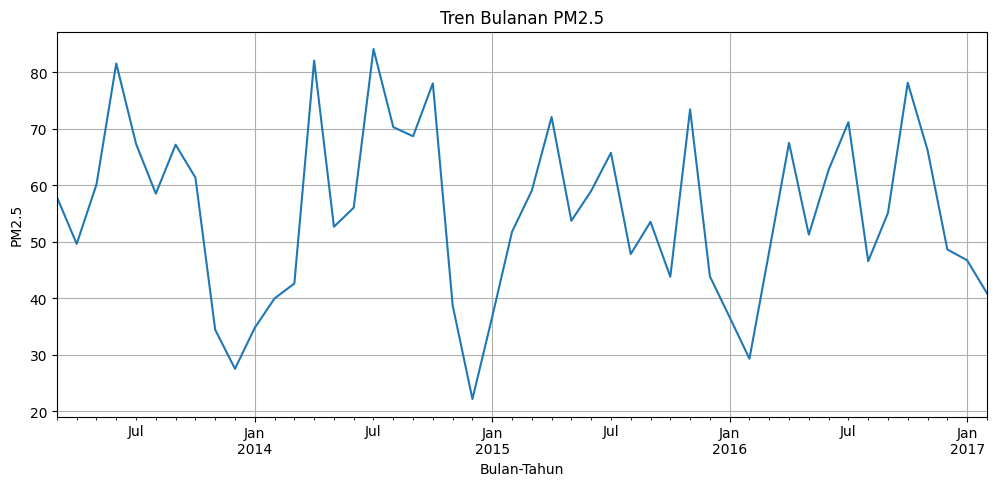

Analisis Tren Rata-rata PM2.5 Bulanan
- Rata-rata PM2.5 bulanan: 55.13 µg/m³
- Nilai maksimum PM2.5 bulanan: 84.14 µg/m³
- Nilai minimum PM2.5 bulanan: 22.17 µg/m³
 Insight: Rata-rata bulanan PM2.5 berada di atas 50 µg/m³, yang mengindikasikan bahwa sebagian besar waktu udara dalam kondisi tidak optimal.


In [37]:
# Pastikan indeks adalah DatetimeIndex
if not isinstance(df.index, pd.DatetimeIndex):
    if 'datetime' in df.columns:  # Jika ada kolom 'datetime', jadikan indeks
        df['datetime'] = pd.to_datetime(df['datetime'])  # Konversi ke datetime
        df.set_index('datetime', inplace=True)  # Atur sebagai indeks
    else:
        raise ValueError("DataFrame tidak memiliki indeks datetime atau kolom 'datetime'.")

# Buat kolom 'month_year' berdasarkan periode bulanan
df['month_year'] = df.index.to_period('M')

# Plot Tren PM2.5 Bulanan
df.groupby('month_year')['PM2.5'].mean().plot(figsize=(12, 5), title='Tren Bulanan PM2.5')
plt.xlabel('Bulan-Tahun')
plt.ylabel('PM2.5')
plt.grid(True)
plt.show()

# Menampilkan hasil analisis dalam bentuk teks
print("Analisis Tren Rata-rata PM2.5 Bulanan")
print(f"- Rata-rata PM2.5 bulanan: {desc_trend['mean']:.2f} µg/m³")
print(f"- Nilai maksimum PM2.5 bulanan: {desc_trend['max']:.2f} µg/m³")
print(f"- Nilai minimum PM2.5 bulanan: {desc_trend['min']:.2f} µg/m³")

# Menambahkan interpretasi berdasarkan tren
if desc_trend['max'] > 100:
    print(" Insight: Konsentrasi PM2.5 tertinggi dalam satu bulan cukup tinggi (>100 µg/m³), yang bisa menunjukkan periode polusi udara yang buruk.")

if desc_trend['min'] < 20:
    print(" Insight: Ada periode dengan PM2.5 yang cukup rendah (<20 µg/m³), yang mungkin menunjukkan kondisi udara yang lebih bersih, misalnya setelah hujan.")

if desc_trend['mean'] > 50:
    print(" Insight: Rata-rata bulanan PM2.5 berada di atas 50 µg/m³, yang mengindikasikan bahwa sebagian besar waktu udara dalam kondisi tidak optimal.")

# Menambahkan informasi jika terjadi fluktuasi besar dalam PM2.5 bulanan
diff = desc_trend['max'] - desc_trend['min']
if diff > 80:
    print("Insight: Terdapat fluktuasi besar dalam kadar PM2.5 antar bulan (>80 µg/m³), yang bisa disebabkan oleh perubahan cuaca atau aktivitas manusia seperti pembakaran bahan bakar.")



# Insight #
* Rata-rata bulanan PM2.5 berada di atas 50 µg/m³, yang mengindikasikan bahwa sebagian besar waktu udara dalam kondisi tidak optimal.


### Pertanyaan 2: Apakah ada korelasi antara suhu (TEMP) dan polutan PM2.5?

Korelasi antara suhu (TEMP) dan PM2.5: 0.19

Kesimpulan:
📈 Korelasi positif: Semakin tinggi suhu, semakin tinggi polusi PM2.5. Hal ini dapat terjadi akibat peningkatan aktivitas industri atau kendaraan bermotor saat suhu meningkat.


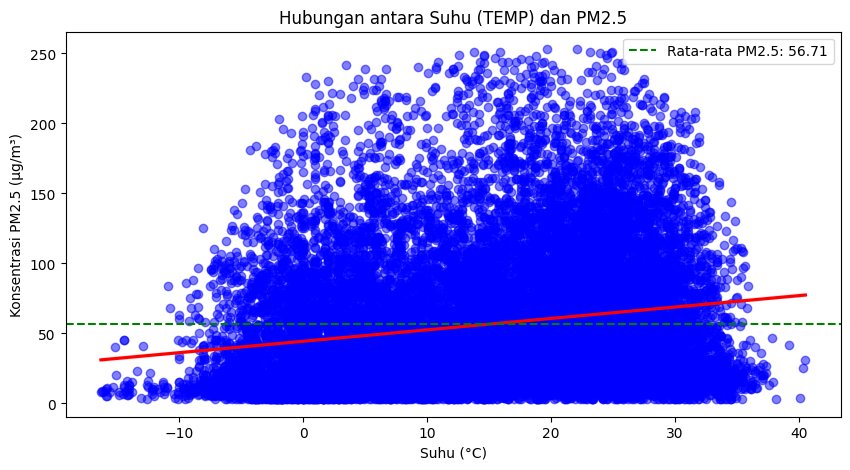

In [38]:
# Hitung korelasi antara suhu dan PM2.5
correlation = df[['TEMP', 'PM2.5']].corr().iloc[0, 1]
print(f'Korelasi antara suhu (TEMP) dan PM2.5: {correlation:.2f}')

# Menentukan kesimpulan berdasarkan nilai korelasi
if correlation < 0:
    insight = "📉 Korelasi negatif: Semakin tinggi suhu, semakin rendah polusi PM2.5. Ini bisa terjadi karena udara panas meningkatkan dispersi polutan atau faktor meteorologi lain seperti peningkatan angin dan konveksi udara."
elif correlation > 0:
    insight = "📈 Korelasi positif: Semakin tinggi suhu, semakin tinggi polusi PM2.5. Hal ini dapat terjadi akibat peningkatan aktivitas industri atau kendaraan bermotor saat suhu meningkat."
else:
    insight = "➖ Tidak ada korelasi yang signifikan antara suhu dan PM2.5, menunjukkan faktor lain mungkin lebih berpengaruh."

print("\nKesimpulan:")
print(insight)

# Visualisasi scatter plot dengan garis regresi
plt.figure(figsize=(10, 5))
sns.regplot(data=df, x='TEMP', y='PM2.5',
            scatter_kws={'alpha': 0.5, 'color': 'blue'},  # Titik data dengan transparansi
            line_kws={'color': 'red'})  # Garis regresi dalam warna merah

# Menambahkan garis rata-rata PM2.5 untuk referensi
plt.axhline(y=df['PM2.5'].mean(), color='green', linestyle='dashed', label=f'Rata-rata PM2.5: {df["PM2.5"].mean():.2f}')

# Menambahkan judul dan label
plt.title("Hubungan antara Suhu (TEMP) dan PM2.5")
plt.xlabel("Suhu (°C)")
plt.ylabel("Konsentrasi PM2.5 (µg/m³)")
plt.legend()  # Menampilkan legenda

# Menampilkan plot
plt.show()


# Insight
* Korelasi positif: Semakin tinggi suhu, semakin tinggi polusi PM2.5. Hal ini dapat terjadi akibat peningkatan aktivitas industri atau kendaraan bermotor saat suhu meningkat.

## Analisis Lanjutan (Opsional)

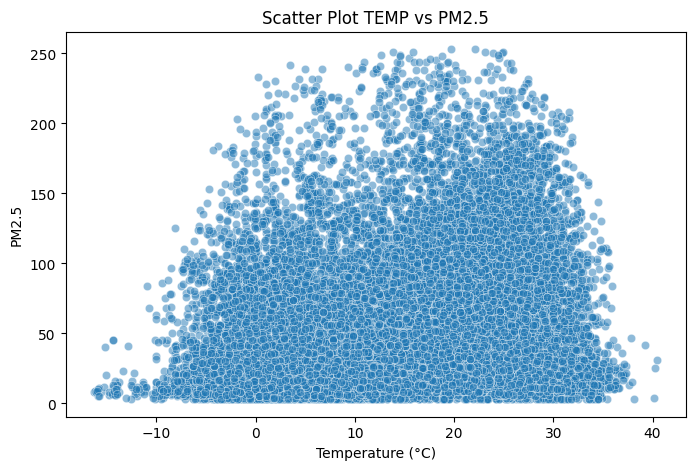

In [39]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['TEMP'], y=df['PM2.5'], alpha=0.5)
plt.title('Scatter Plot TEMP vs PM2.5')
plt.xlabel('Temperature (°C)')
plt.ylabel('PM2.5')
plt.show()

## Conclusion

- Conclution pertanyaan 1 :
Analisis Tren Rata-rata PM2.5 Bulanan
- Rata-rata PM2.5 bulanan: 55.13 µg/m³
- Nilai maksimum PM2.5 bulanan: 84.14 µg/m³
- Nilai minimum PM2.5 bulanan: 22.17 µg/m³
 Insight: Rata-rata bulanan PM2.5 berada di atas 50 µg/m³, yang mengindikasikan bahwa sebagian besar waktu udara dalam kondisi tidak optimal

- Conclution pertanyaan 2 :
Korelasi antara suhu (TEMP) dan PM2.5: 0.19

- Kesimpulan: Semakin tinggi suhu, semakin tinggi polusi PM2.5. Hal ini dapat terjadi akibat peningkatan aktivitas industri atau kendaraan bermotor saat suhu meningkat.